In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, wilcoxon

In [11]:
# List of enemies and number of runs per enemy
enemies = [2, 5, 8]
runs = 5

# Function to load final test results from files
def load_final_test_results(algorithm_prefix, folder, enemy, run):
    filepath = f"{folder}/{algorithm_prefix}_results_enemy_{enemy}_run_{run}.txt"
    return np.loadtxt(filepath)

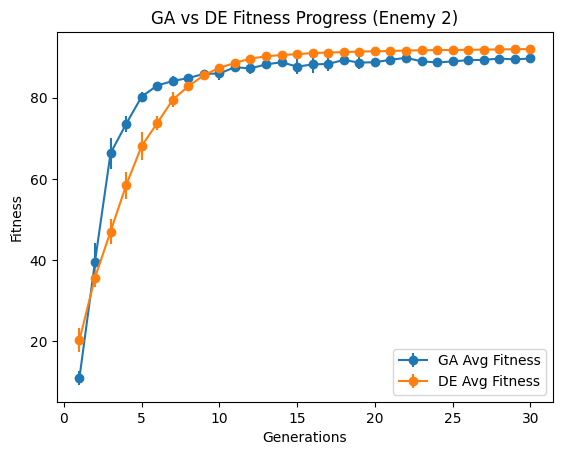

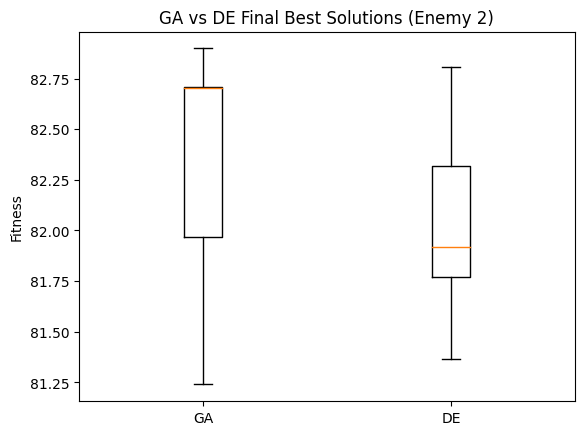

t-test P-value (Enemy 2): 0.5187747623714737
Wilcoxon P-value (Enemy 2): 0.625


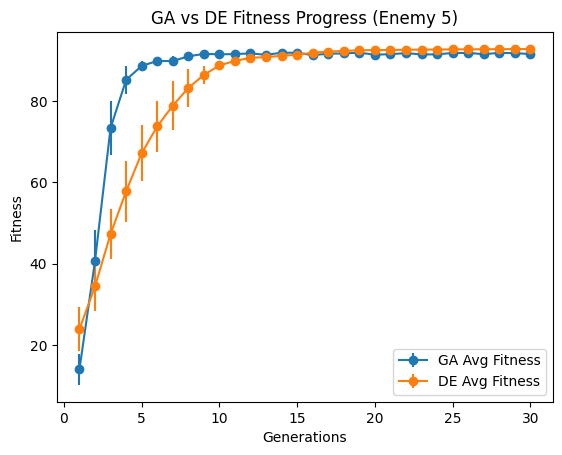

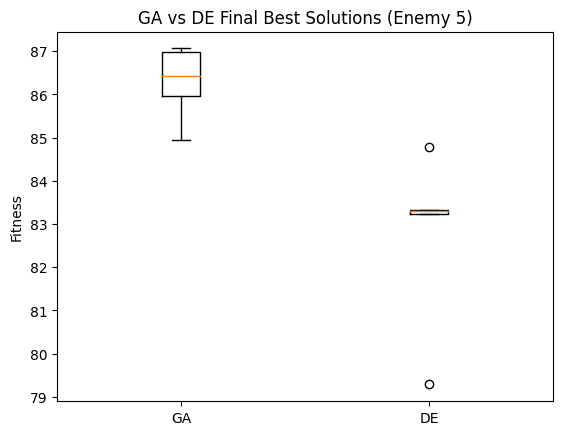

t-test P-value (Enemy 5): 0.0080966695595975
Wilcoxon P-value (Enemy 5): 0.0625


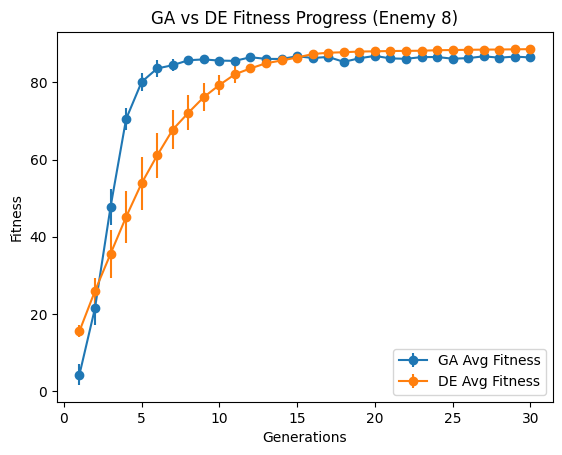

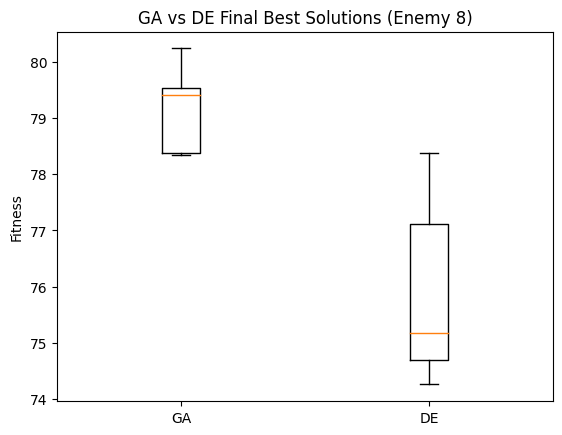

t-test P-value (Enemy 8): 0.005493625459110656
Wilcoxon P-value (Enemy 8): 0.125


In [12]:
# Function to plot average fitness progress with standard deviation
def plot_fitness_progress(ga_results, de_results, enemy):
    # Compute average and standard deviation for GA
    ga_avg_per_gen = np.mean(ga_results, axis=0)
    ga_std_per_gen = np.std(ga_results, axis=0)

    # Compute average and standard deviation for DE
    de_avg_per_gen = np.mean(de_results, axis=0)
    de_std_per_gen = np.std(de_results, axis=0)

    generations = np.arange(1, len(ga_avg_per_gen) + 1)

    # Plot GA and DE
    plt.errorbar(generations, ga_avg_per_gen, yerr=ga_std_per_gen, label="GA Avg Fitness", fmt='-o')
    plt.errorbar(generations, de_avg_per_gen, yerr=de_std_per_gen, label="DE Avg Fitness", fmt='-o')

    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title(f"GA vs DE Fitness Progress (Enemy {enemy})")
    plt.legend()
    plt.show()

# Function to create boxplot for final best solutions
def plot_boxplot(ga_final_test, de_final_test, enemy):
    # Calculate the mean of the 5 tests for each run
    ga_means = [np.mean(results) for results in ga_final_test]
    de_means = [np.mean(results) for results in de_final_test]

    # Plot the boxplot for GA vs DE
    plt.boxplot([ga_means, de_means], labels=["GA", "DE"])
    plt.title(f"GA vs DE Final Best Solutions (Enemy {enemy})")
    plt.ylabel("Fitness")
    plt.show()

    return ga_means, de_means

# perform t-test and Wilcoxon
def perform_stat_tests(ga_means, de_means, enemy):
    # t-test
    t_stat, t_p_value = ttest_ind(ga_means, de_means)
    print(f"t-test P-value (Enemy {enemy}): {t_p_value}")

    # wilcoxon test
    try:
        w_stat, w_p_value = wilcoxon(ga_means, de_means)
        print(f"Wilcoxon P-value (Enemy {enemy}): {w_p_value}")
    except ValueError as e:
        print(f"Wilcoxon test could not be performed for Enemy {enemy}: {e}")

for enemy in enemies:
    # load each run / enemy
    ga_results = [np.loadtxt(f"genetic_algorithm_experiments/ga_results_enemy_{enemy}_run_{run}.txt")
                  for run in range(1, 6)]
    de_results = [np.loadtxt(f"differential_evolution_experiments/de_results_enemy_{enemy}_run_{run}.txt")
                  for run in range(1, 6)]

    plot_fitness_progress(ga_results, de_results, enemy)

    ga_final_test_results = [load_final_test_results("ga", "genetic_algorithm_experiments", enemy, run) for run in range(1, 6)]
    de_final_test_results = [load_final_test_results("de", "differential_evolution_experiments", enemy, run) for run in range(1, 6)]

    # boxplot
    ga_means, de_means = plot_boxplot(ga_final_test_results, de_final_test_results, enemy)

    # tests
    perform_stat_tests(ga_means, de_means, enemy)
